# Another machine learning
在这里想比较一下其他的机器学习的算法，来证明自己模型的表现结果

## 代码理解与总结
主要涉及的代码包含 `make_scorer`,`cross_validate`,`fill_between`,`np.linspace`

`np.linspace(start,stop,num)`: 构建包含num个数的等差数列

`plt.fill_between(x, y1, y2)`:用颜色填充y1和y2这两条曲线之间的区域。

`cross_validate(estimator, X, y=None, scoring=None, cv=None, n_jobs=None, verbose=0)`: sklearn库中用于模型的交叉验证的工具，estimator是具有fit属性的预测其，X，Y分别是训练数据与标签，CV是进行判断的次数，n_jobs只的是使用的核数，verbose指的是信息输出的多少。

## 总结：

第一次：使用的全部都是回归模型，然后模型的判断标准为MSE，而我们的问题应该为分类模型，评价标准也应该相对应的修改，选择了ROC。

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_curve,roc_curve,auc,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold

In [31]:
from sklearn.metrics import roc_auc_score,make_scorer #制作评价标准
scorer = make_scorer(roc_auc_score)
def evaluate(estimator,test_X,test_Y):
        pred = estimator.predict(test_X)
        result = roc_auc_score(test_Y,pred)
        return result

In [3]:
import pandas as pd
import numpy as np

Blosum62_matrix = pd.read_csv("/Users/wangguangshuai/Data/MHCII/Data/another_machine_learning/BLOSUM62.csv",comment="#")
Protein_alphabet = list("ARNDCQEGHILKMFPSTWYVX")
Blosum62_matrix = Blosum62_matrix[Protein_alphabet]
Blosum62_matrix = Blosum62_matrix.loc[Protein_alphabet]
Blosum62_matrix

def blosum62(peptide,maxlen):
    encoder = np.empty((maxlen,21))
    if len(peptide) <=maxlen:
        peptide = peptide + "X"*(maxlen-len(peptide))
    for i in range(len(peptide)):
        pep = list(peptide)[i]
        coder = Blosum62_matrix[pep]
        encoder[i] = coder
    return encoder.flatten()

In [48]:
def method(estimator):
    kf = KFold(n_splits=5)
    fold_indices = list(kf.split(np.arange(X.shape[0])))
    holding = {'validation': [], 'IEDB': []}
    for fold in fold_indices:
        # split
        train_X, train_Y, test_X, test_Y = X[fold[0]], np.array(Y)[fold[0]], X[fold[1]], np.array(Y)[fold[1]]
        # train
        estimator.fit(train_X, train_Y)
        # test in validation set
        result_validation = evaluate(estimator, test_X, test_Y)
        holding['validation'].append(result_validation)
        # test in IEDB
        AUC = evaluate(estimator, IEDB_X, IEDB_Y)
        holding['IEDB'].append(AUC)
    return holding

## Data process
数据要处理成符合使用的格式

In [6]:
#数据处理的过程；
# X = np.empty((len(dataset), 12 * 56))  # 28581
#     Y = ori['immunogenicity'].values
#     for i, (x, y, _) in enumerate(dataset):
#         x = x.reshape(-1)  # 10*12*1 ---> 120
#         y = y.reshape(-1)  # 46*12*1 ---> 552
#         X[i, :] = np.concatenate([x, y])  #
#即将每一个的peptide与HLA信息连在了一起

In [7]:
immuno_data = pd.read_csv("/Users/wangguangshuai/Data/MHCII/Data/another_machine_learning/IMM_data_random2.csv")
immuno_data["pep_blosum"] = immuno_data["Description"].apply(blosum62,args=(21,))
immuno_data["MHC_blosum"] = immuno_data["sequence"].apply(blosum62,args=(34,))

In [8]:
X = np.empty((len(immuno_data),1155))
for i in range(len(immuno_data)):
    x = immuno_data.iloc[i,6]
    y = immuno_data.iloc[i,7]
    X[i, :] = np.concatenate((x,y))
Y = immuno_data["label"].values

In [9]:
IEDB_benchmark = pd.read_csv("/Users/wangguangshuai/Data/MHCII/Data/another_machine_learning/IEDB_benchmark_with_random.csv")
IEDB_benchmark["pep_blosum"] = IEDB_benchmark["Description"].apply(blosum62,args=(21,))
IEDB_benchmark["MHC_blosum"] = IEDB_benchmark["sequence"].apply(blosum62,args=(34,))

In [10]:
IEDB_X = np.empty((len(IEDB_benchmark),1155))
for i in range(len(IEDB_benchmark)):
    x = IEDB_benchmark.iloc[i,7]
    y = IEDB_benchmark.iloc[i,8]
    X[i, :] = np.concatenate((x,y))
IEDB_Y = IEDB_benchmark["label"].values

In [11]:
holder = {}

## ada boost Classifier
首先第一个是 ada boost Classifier

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier

cross_validate用于进行交叉验证，最重要的是需要一个具有fit属性的estimator，X时训练数据，Y是目标值，cv是交叉验证次数，scoring是进行评判的标准，n_jobs是并行的核数，verbose是信息出现的多少

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ......................................., score=0.490 total time=   4.8s
[CV] END ......................................., score=0.531 total time=  23.4s
[CV] END ......................................., score=0.547 total time=  41.9s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.4s finished


[Text(0, 0, '20.00'),
 Text(1, 0, '60.00'),
 Text(2, 0, '100.00'),
 Text(3, 0, '140.00'),
 Text(4, 0, '180.00'),
 Text(5, 0, '220.00')]

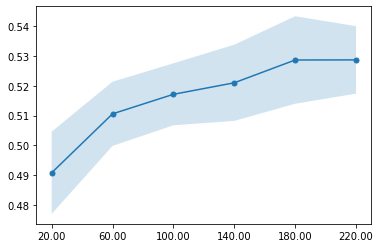

In [39]:
cv_results = []
space = np.linspace(20, 220, 6) #这里应该是通过交叉验证，选择最好的n_estimators，寻找最优的参数
for i in space:
    cv_result = cross_validate(AdaBoostClassifier(n_estimators=int(i)), X, Y, cv=3, scoring=scorer, n_jobs=-1,
                               verbose=5)
    cv_results.append(cv_result)

y1 = [item['test_score'].mean() for item in cv_results] #列表表达式
y1_e = [item['test_score'].std() for item in cv_results]

ax1 = plt.subplot(1, 1, 1)
ax1.plot(np.arange(len(space)), y1, marker='o', markersize=5) #每次交叉验证的平均值
ax1.fill_between(np.arange(len(space)), [y1[i] - y1_e[i] for i in range(len(space))],
                 [y1[i] + y1_e[i] for i in range(len(space))], alpha=0.2) #加上与减去std来绘制区域
ax1.set_xticks(np.arange(len(space)))
ax1.set_xticklabels(['{0:.2f}'.format(i) for i in space])

In [40]:
estimator = AdaBoostClassifier(n_estimators=180)
holder['adaboost'] = method(estimator = estimator)

[CV] END ......................................., score=0.520 total time=  33.4s
[CV] END ......................................., score=0.511 total time=  41.0s
[CV] END ......................................., score=0.526 total time=  16.1s
[CV] END ......................................., score=0.505 total time=  24.4s


In [41]:
holder

{'adaboost': {'validation': [0.5361302962877219,
   0.5937632182873599,
   0.5731677196975614,
   0.5361175296199031,
   0.5680365686944634],
  'IEDB': [0.5, 0.5, 0.5, 0.5, 0.5]}}

## ElasticNet

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/wangguangshuai/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+02, tolerance: 2.528e-01
  model = cd_fast.enet_coordinate_descent(
/Users/wangguangshuai/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.459e+02, tolerance: 2.385e-01
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.2s remaining:   28.9s
/Users/wangguangshuai/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.p

[Text(0, 0, '0.01'),
 Text(1, 0, '0.26'),
 Text(2, 0, '0.51'),
 Text(3, 0, '0.75'),
 Text(4, 0, '1.00')]

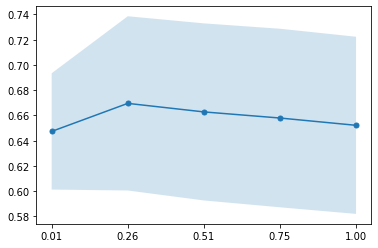

In [42]:
cv_results = []
from sklearn.linear_model import ElasticNet
space = np.linspace(0.01,1,5)
for i in space:
    cv_result = cross_validate(ElasticNet(alpha=0.01,l1_ratio=i),X,Y,cv=5,scoring=scorer,n_jobs=-1,verbose=5)
    cv_results.append(cv_result)
y1 = [item['test_score'].mean() for item in cv_results]
y1_e = [item['test_score'].std() for item in cv_results]
ax1 = plt.subplot(1,1,1)
ax1.plot(np.arange(len(space)),y1,marker='o',markersize=5)
ax1.fill_between(np.arange(len(space)),[y1[i]-y1_e[i] for i in range(len(space))],[y1[i]+y1_e[i] for i in range(len(space))],alpha=0.2)
ax1.set_xticks(np.arange(len(space)))
ax1.set_xticklabels(['{0:.2f}'.format(i) for i in space])

In [43]:
estimator = ElasticNet(alpha=0.01, l1_ratio=0.26)
holder['ElasticNet'] = method(estimator = estimator)

In [44]:
holder

{'adaboost': {'validation': [0.5361302962877219,
   0.5937632182873599,
   0.5731677196975614,
   0.5361175296199031,
   0.5680365686944634],
  'IEDB': [0.5, 0.5, 0.5, 0.5, 0.5]},
 'ElasticNet': {'validation': [0.5705475027831011,
   0.6468046618368356,
   0.6903246977381691,
   0.6567346248768509,
   0.7829776144907724],
  'IEDB': [0.5, 0.5, 0.5, 0.5, 0.5]}}

## KNN Classifier
超参选择

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.7s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.6s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.9s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.5s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

[Text(0, 0, '1.00'),
 Text(1, 0, '12.00'),
 Text(2, 0, '23.00'),
 Text(3, 0, '34.00'),
 Text(4, 0, '45.00'),
 Text(5, 0, '56.00'),
 Text(6, 0, '67.00'),
 Text(7, 0, '78.00'),
 Text(8, 0, '89.00'),
 Text(9, 0, '100.00')]

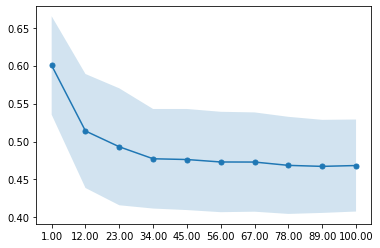

In [45]:
# KNN Classifier
cv_results = []
from sklearn.neighbors import KNeighborsClassifier
space = np.linspace(1,100,10)
for i in space:
    cv_result = cross_validate(KNeighborsClassifier(n_neighbors=int(i)),X,Y,cv=5,scoring=rmse,n_jobs=-1,verbose=5)
    cv_results.append(cv_result)
y1 = [item['test_score'].mean() for item in cv_results]
y1_e = [item['test_score'].std() for item in cv_results]
ax1 = plt.subplot(1,1,1)
ax1.plot(np.arange(len(space)),y1,marker='o',markersize=5)
ax1.fill_between(np.arange(len(space)),[y1[i]-y1_e[i] for i in range(len(space))],[y1[i]+y1_e[i] for i in range(len(space))],alpha=0.2)
ax1.set_xticks(np.arange(len(space)))
ax1.set_xticklabels(['{0:.2f}'.format(i) for i in space])

In [49]:
estimator = KNeighborsClassifier(n_neighbors=1)
holder['KNN'] = method(estimator = estimator)
holder

{'adaboost': {'validation': [0.5361302962877219,
   0.5937632182873599,
   0.5731677196975614,
   0.5361175296199031,
   0.5680365686944634],
  'IEDB': [0.5, 0.5, 0.5, 0.5, 0.5]},
 'ElasticNet': {'validation': [0.5705475027831011,
   0.6468046618368356,
   0.6903246977381691,
   0.6567346248768509,
   0.7829776144907724],
  'IEDB': [0.5, 0.5, 0.5, 0.5, 0.5]},
 'KNN': {'validation': [0.6121764779016774,
   0.6080839670611528,
   0.6533779971452747,
   0.6705894776823489,
   0.719993164730007],
  'IEDB': [0.5, 0.5, 0.5, 0.5, 0.5]}}

## random forest Classifier

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

[Text(0, 0, '1.00'),
 Text(1, 0, '6.21'),
 Text(2, 0, '11.42'),
 Text(3, 0, '16.63'),
 Text(4, 0, '21.84'),
 Text(5, 0, '27.05'),
 Text(6, 0, '32.26'),
 Text(7, 0, '37.47'),
 Text(8, 0, '42.68'),
 Text(9, 0, '47.89'),
 Text(10, 0, '53.11'),
 Text(11, 0, '58.32'),
 Text(12, 0, '63.53'),
 Text(13, 0, '68.74'),
 Text(14, 0, '73.95'),
 Text(15, 0, '79.16'),
 Text(16, 0, '84.37'),
 Text(17, 0, '89.58'),
 Text(18, 0, '94.79'),
 Text(19, 0, '100.00')]

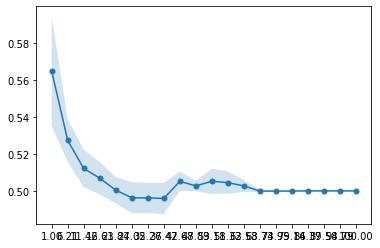

In [51]:
# random forest regression
cv_results = []
from sklearn.ensemble import RandomForestClassifier
space = np.linspace(1, 100, 20)
for i in space:
    cv_result = cross_validate(RandomForestClassifier(n_estimators=200,min_samples_leaf=int(i)), X, Y, cv=3, scoring=rmse, n_jobs=-1,
                               verbose=5)
    cv_results.append(cv_result)
y1 = [item['test_score'].mean() for item in cv_results]
y1_e = [item['test_score'].std() for item in cv_results]
ax1 = plt.subplot(1, 1, 1)
ax1.plot(np.arange(len(space)), y1, marker='o', markersize=5)
ax1.fill_between(np.arange(len(space)), [y1[i] - y1_e[i] for i in range(len(space))],
                 [y1[i] + y1_e[i] for i in range(len(space))], alpha=0.2)
ax1.set_xticks(np.arange(len(space)))
ax1.set_xticklabels(['{0:.2f}'.format(i) for i in space])

In [52]:
estimator = RandomForestClassifier(n_estimators=200,min_samples_leaf=1)
holder['RF'] = method(estimator = estimator)

## SVC

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/wangguangshuai/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wangguangshuai/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wangguangshuai/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | 

[Text(0, 0, '0.00'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.10'),
 Text(3, 0, '1.00'),
 Text(4, 0, '10.00'),
 Text(5, 0, '100.00'),
 Text(6, 0, '1000.00')]

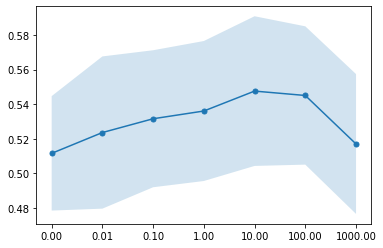

In [54]:
cv_results = []
from sklearn.svm import LinearSVC
space = np.logspace(-3, 3, 7)
for i in space:
    cv_result = cross_validate(LinearSVC(C=i), X, Y, cv=3, scoring=rmse, n_jobs=-1,
                               verbose=5)
    cv_results.append(cv_result)
y1 = [item['test_score'].mean() for item in cv_results]
y1_e = [item['test_score'].std() for item in cv_results]
ax1 = plt.subplot(1, 1, 1)
ax1.plot(np.arange(len(space)), y1, marker='o', markersize=5)
ax1.fill_between(np.arange(len(space)), [y1[i] - y1_e[i] for i in range(len(space))],
                 [y1[i] + y1_e[i] for i in range(len(space))], alpha=0.2)
ax1.set_xticks(np.arange(len(space)))
ax1.set_xticklabels(['{0:.2f}'.format(i) for i in space])

In [55]:
estimator = LinearSVC(C=0.01)
holder['SVM'] = method(estimator = estimator)

/Users/wangguangshuai/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wangguangshuai/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wangguangshuai/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wangguangshuai/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/wangguangshuai/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [56]:
holder

{'adaboost': {'validation': [0.5361302962877219,
   0.5937632182873599,
   0.5731677196975614,
   0.5361175296199031,
   0.5680365686944634],
  'IEDB': [0.5, 0.5, 0.5, 0.5, 0.5]},
 'ElasticNet': {'validation': [0.5705475027831011,
   0.6468046618368356,
   0.6903246977381691,
   0.6567346248768509,
   0.7829776144907724],
  'IEDB': [0.5, 0.5, 0.5, 0.5, 0.5]},
 'KNN': {'validation': [0.6121764779016774,
   0.6080839670611528,
   0.6533779971452747,
   0.6705894776823489,
   0.719993164730007],
  'IEDB': [0.5, 0.5, 0.5, 0.5, 0.5]},
 'RF': {'validation': [0.5924275357658851,
   0.6154997075102371,
   0.6190012912155886,
   0.5919328434455086,
   0.6735987696514012],
  'IEDB': [0.5, 0.5, 0.5, 0.5, 0.5]},
 'SVM': {'validation': [0.4945424067428929,
   0.6038563650272241,
   0.5940043348886975,
   0.5299221536406308,
   0.549137047163363],
  'IEDB': [0.5, 0.5, 0.5, 0.5, 0.5]}}